In [1]:
# Copyright 2018-2020 Erasmus+ ICCT Project Consortium
#
# Redistribution and use in source and binary forms, with or without modification, 
# are permitted provided that the following conditions are met:
#
# 1. Redistributions of source code must retain the above copyright notice, 
# this list of conditions and the following disclaimer.
#
# 2. Redistributions in binary form must reproduce the above copyright notice, 
# this list of conditions and the following disclaimer in the documentation and/or 
# other materials provided with the distribution.
#
# 3. Neither the name of the copyright holder nor the names of its contributors
# may be used to endorse or promote products derived from this software without specific prior written permission.
#
# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, 
# INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED.
# IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, 
# OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, 
# OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, 
# OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE 
# POSSIBILITY OF SUCH DAMAGE.

In [2]:
from IPython.display import HTML

# # Cell visibility - COMPLETE:
# tag = HTML('''<style> div.input {display:none;} </style>''')

#Cell visibility - TOGGLE:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<p style="text-align:right">
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.</p>''')

display(tag)

In [3]:
# Erasmus+ ICCT project (2018-1-SI01-KA203-047081)

%matplotlib notebook
import scipy.signal as signal
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from ipywidgets import widgets
from ipywidgets import interact

## Loading problem

When a systems is represented by a block diagram, the main idea is that an input signal influences the output signal. The output can then be used as an input for a next block. The implicit suppositon is however that when a new block is connected, nothing will change in the previous block. This is however not true. This fact is usually stated as the »Loading problem«. As an example, lets take a look at the two systems shown below.

<table>
    <tr>
        <th style="text-align:center">Schematic representation of the loading problem</th>
    </tr>
    <tr>
        <td style><img src='img/loading_problem.png'></td>
    </tr>
    <tr>
    </tr>    
</table>

From the control theory point of view each of them could be analyzed separately and transfer functions $P_1(s)$ and $P_2(s)$ can be obtained. If the blocks are then connected, we might think that the transfer function of the combined system $P(s)$ is equal to $P_1(s) \cdot P_2(s)$, because the output of the first system is the input for the second system. The step response for this transfer function is shown in orange in the plot below ("control theory" response).

If we however analyze the system from the electrical engineering point of view, we end up with a different transfer function. The associated step response is shown in green in the plot below ("electrical engineering" response). The difference between the two is due to the loading problem.
If however the input impedance of the second system is much higher than the output impedance of the first one, the difference is negligible for all practical purposes.

---

### How to use this notebook?
Move the sliders to change the values of $R_1$, $R_2$, $L_1$ and $L_2$ and observe the "control theory" and "electrical engineering" response together with the corresponding transfer functions.

<IPython.core.display.Javascript object>


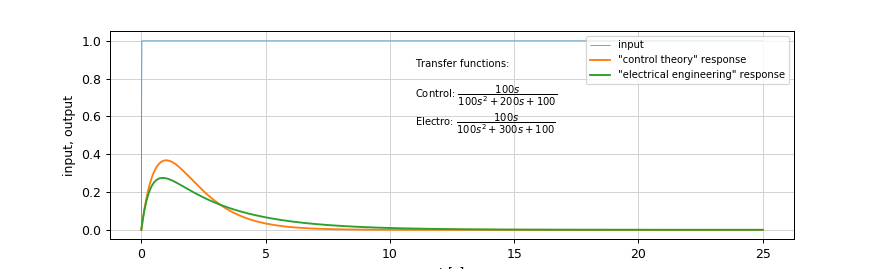

interactive(children=(IntSlider(value=10, description='$R_1$', max=300, min=1), IntSlider(value=10, descriptio…

In [4]:
num_of_samples = 100
total_time = 25
t = np.linspace(0, total_time, num_of_samples*10)# time for which response is calculated (start, stop, step)

# making step function (for plotting)
step_function = np.ones(len(t))
step_function[0]=0

# make figure
fig = plt.figure(figsize=(9.8, 3),num='Loading problem - Time response')

# add axes
ax = fig.add_subplot(111)
ax.set_xlabel('t [s]')
ax.set_ylabel('input, output')

ax.grid(which='both', axis='both', color='lightgray')


# plot step function and responses (initalisation)
ax.plot(t, step_function, lw=.5, label='input')

resp1, = ax.plot([], [], lw=1.5, label='"control theory" response')
resp2, = ax.plot([], [], lw=1.5, label='"electrical engineering" response')
ax.legend(loc=1, fontsize=8)

R1=1
L1=1
R2=1
L2=1

eq = ax.text((-ax.get_xlim()[0]+ax.get_xlim()[1])*.4, (-ax.get_ylim()[0]+ax.get_ylim()[1])*.5, '',fontsize=8)
# eq.set_bbox(dict(facecolor='b', alpha=0.07, edgecolor='red'))

plt.show()

def set_input(R1=10, R2=20, L1=20, L2=4):
    # make transfer functions (with scipy)
    control_transfer = signal.TransferFunction([R2*L1, 0], [L1*L2, R2*L1+R1*L2, R1*R2])
    electro_transfer = signal.TransferFunction([R2*L1, 0], [L1*L2, R2*L1+R1*L1+R1*L2, R1*R2])
    # calculate step response (with scipy)
    time1, response1 = signal.step(control_transfer, T=t)
    time2, response2 = signal.step(electro_transfer, T=t)

    # update responses plots
    resp1.set_data(time1, response1)
    resp2.set_data(time2, response2)
    
    plt.show()
    
    #update strings for equations
    niz_gor_con = str(R2*L1) + 's'
    niz_dol_con = str(L1*L2) + 's^2 + ' + str(R2*L1+R1*L2) + 's + ' + str(R1*R2)
    niz_gor_ele = str(R2*L1) + 's'
    niz_dol_ele = str(L1*L2) + 's^2 + ' + str(R2*L1+R1*L1+R1*L2) + 's + ' + str(R1*R2)
    #update equations
    tekst = 'Transfer functions:\n\nControl: $\dfrac{' + niz_gor_con + '}{' + niz_dol_con + '}$\nElectro: $\dfrac{' + niz_gor_ele + '}{' + niz_dol_ele + '}$'
    eq.set_text(tekst)

# make string to show equations
niz_gor_con = str(R2*L1) + 's'
niz_dol_con = str(L1*L2) + 's^2 + ' + str(R2*L1+R1*L2) + 's + ' + str(R1*R2)
niz_gor_ele = str(R2*L1) + 's'
niz_dol_ele = str(L1*L2) + 's^2 + ' + str(R2*L1+R1*L1+R1*L2) + 's + ' + str(R1*R2)

interact(set_input, R1=widgets.IntSlider(min=1,max=300,step=1,value=10,description='$R_1$'),
         R2=widgets.IntSlider(min=1,max=300,step=1,value=10,description='$R_2$'),
         L1=widgets.IntSlider(min=1,max=300,step=1,value=10,description='$L_1$'),
         L2=widgets.IntSlider(min=1,max=300,step=1,value=10,description='$L_2$'));
